# Decision Tree

In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function

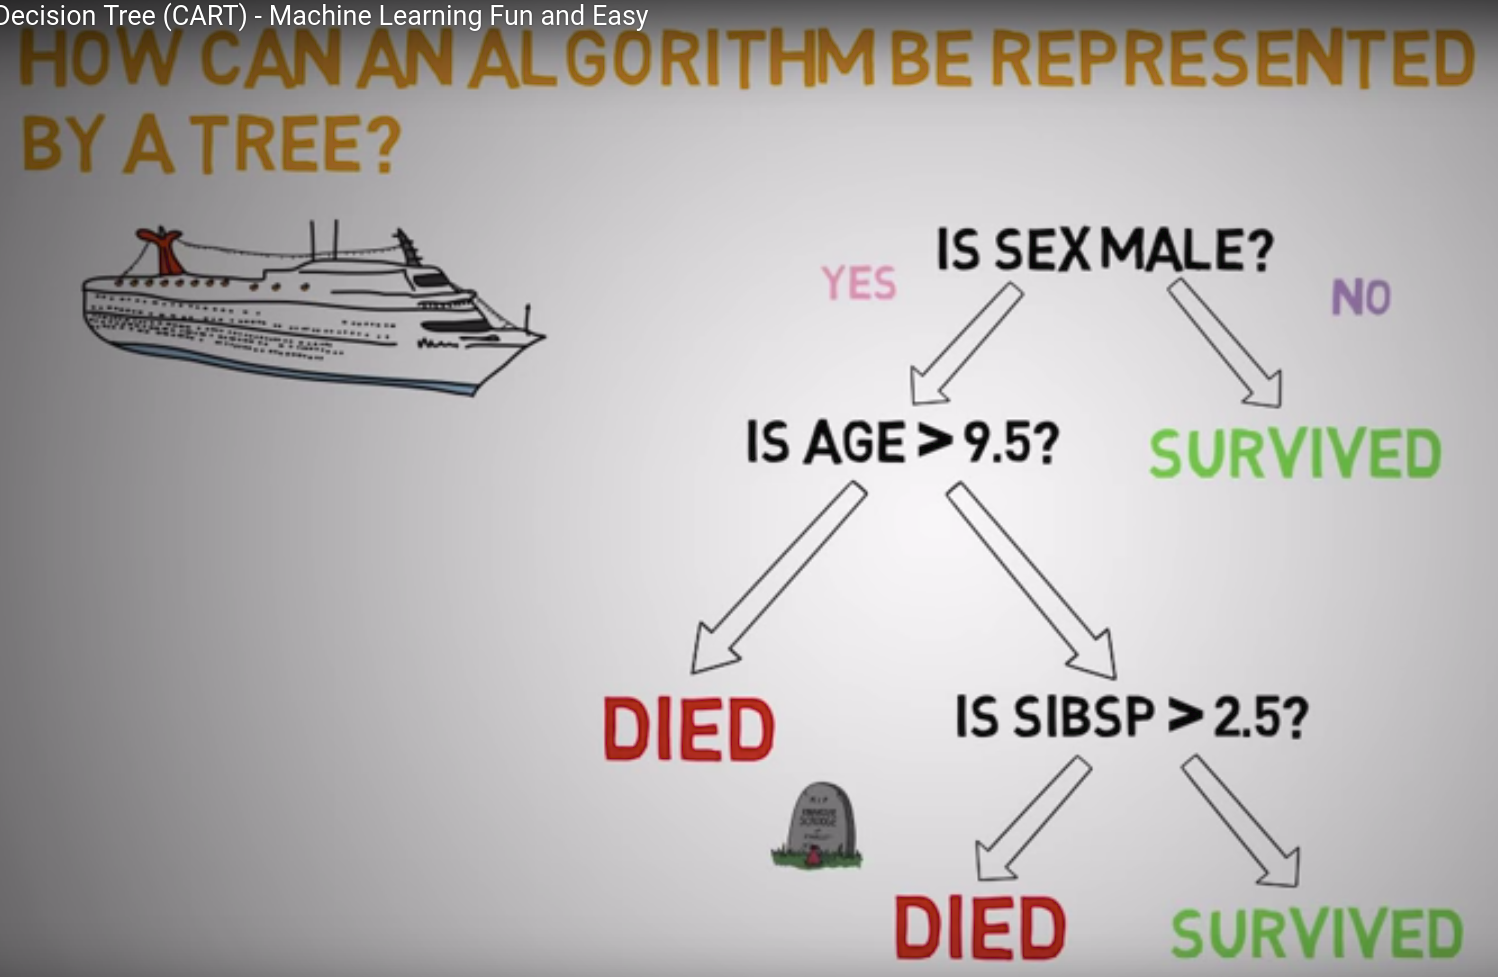

In [2]:
from PIL import Image
Image.open('aaa.png')
# titanic

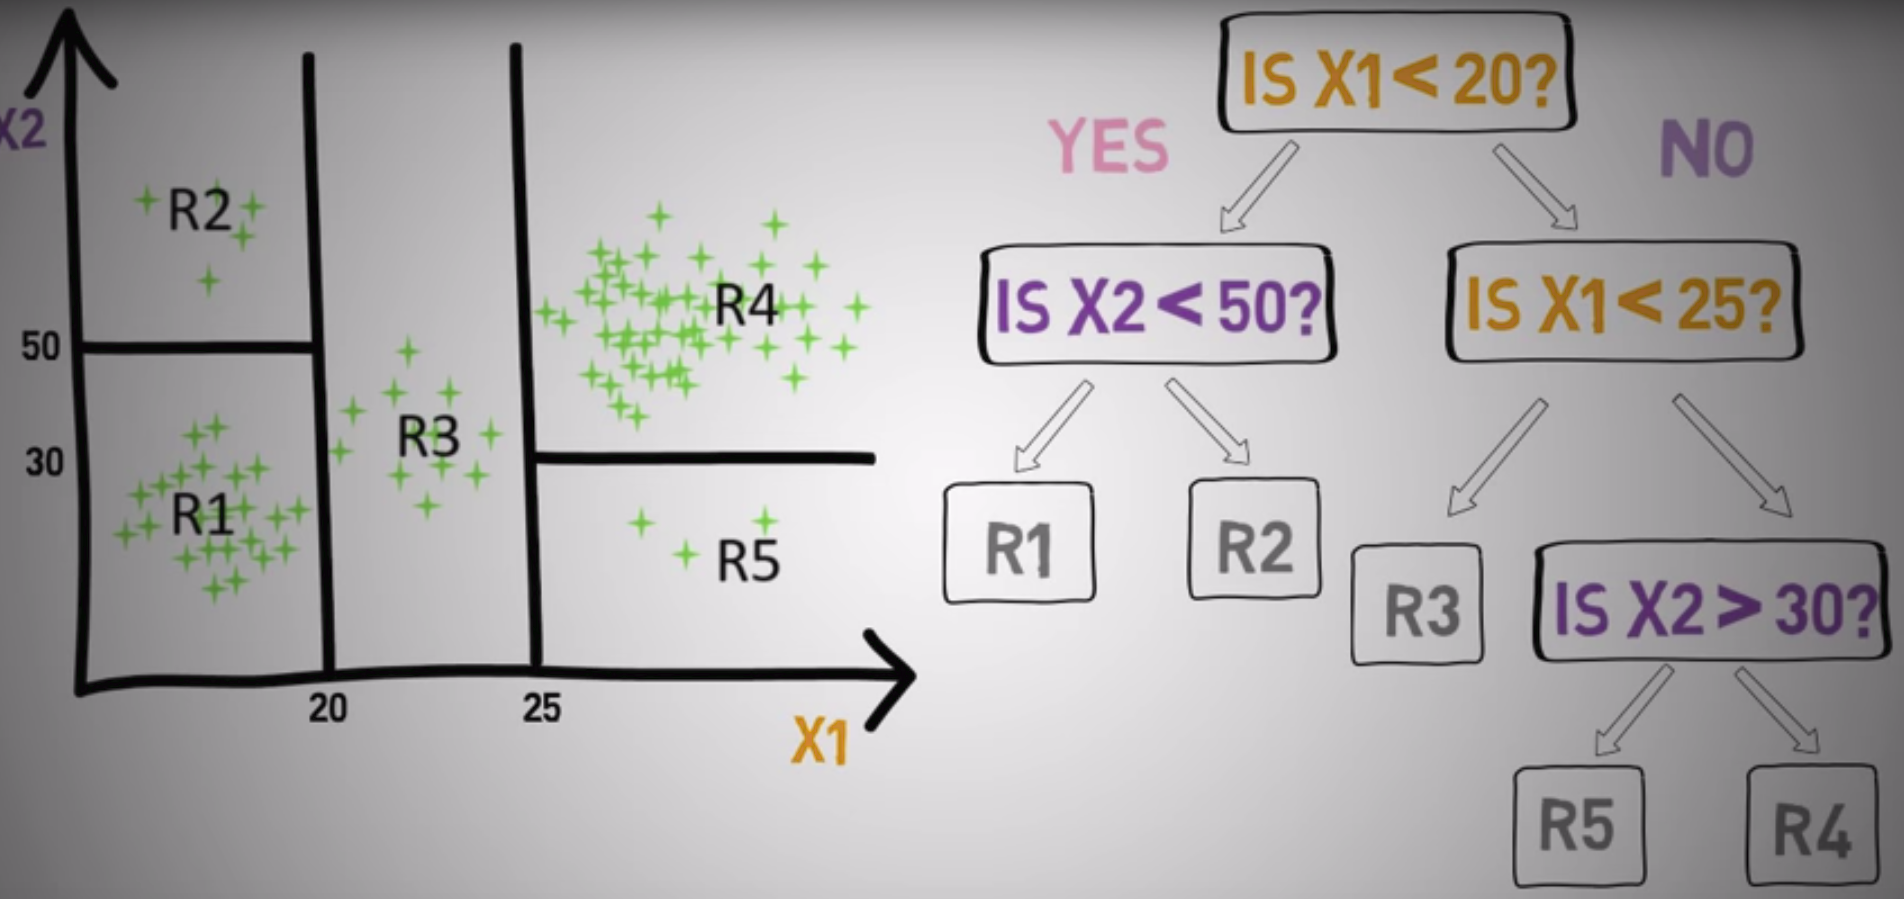

In [3]:
Image.open('aaa2.png')
# which region?

In [4]:
# Main Problem for today: Predict which type of fruit based on features (colors & size)
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

In [5]:
pd.DataFrame(training_data, columns=['Color', 'Diameter', 'Label'], index=np.arange(0,5))

,Color,Diameter,Label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


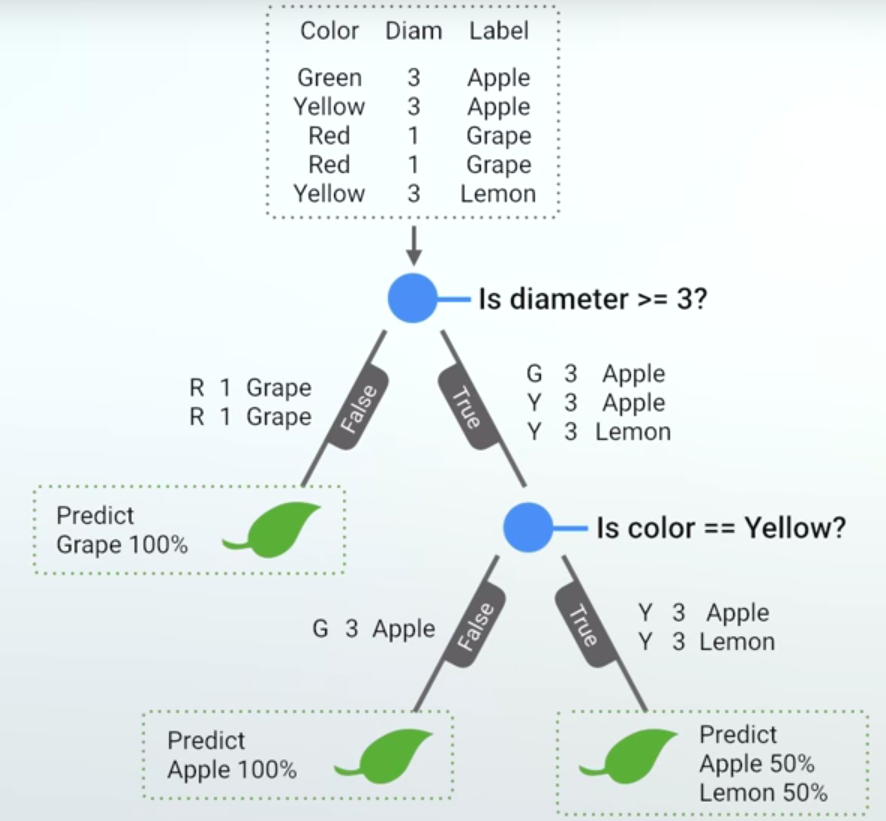

In [6]:
Image.open("DT1.png")

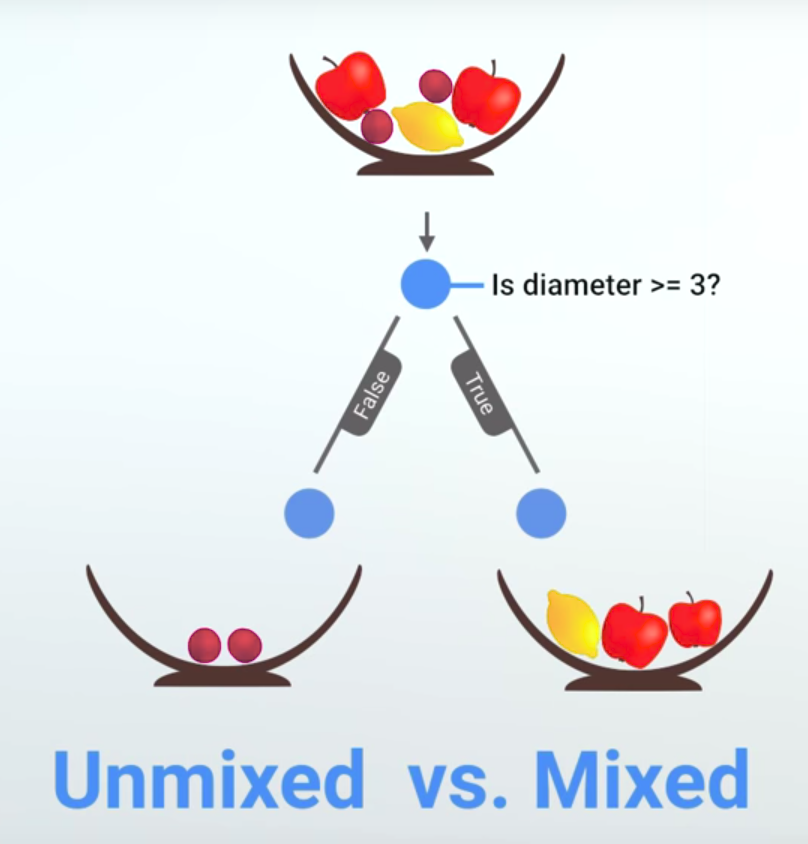

In [7]:
# To build an effective tree, it's important to understand which question to ask and when
# The AIM of an effective question is to UNMIX the labels
# To know which question to ask, we have to understand 2 phenomenons: Gini Impurity and Information Gain
Image.open("mixed.png")

# Gini Impurity (Uncertainty)

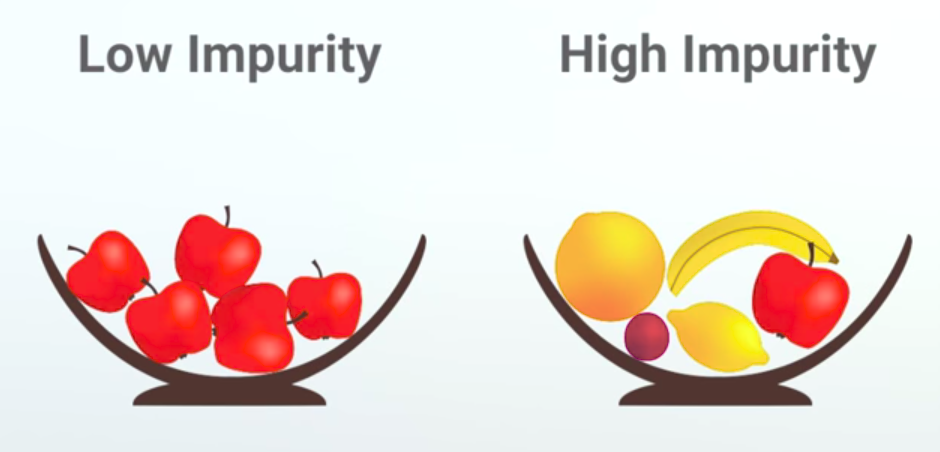

In [8]:
# Possibility => ranging from 0 to 1

Image.open("gini.png")

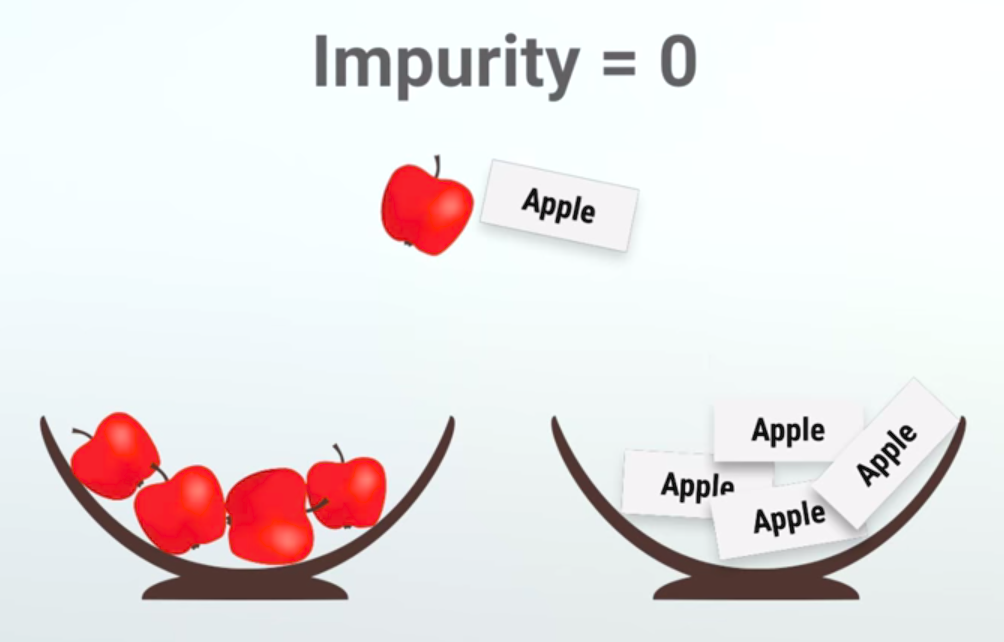

In [9]:
Image.open("impurity0.png")

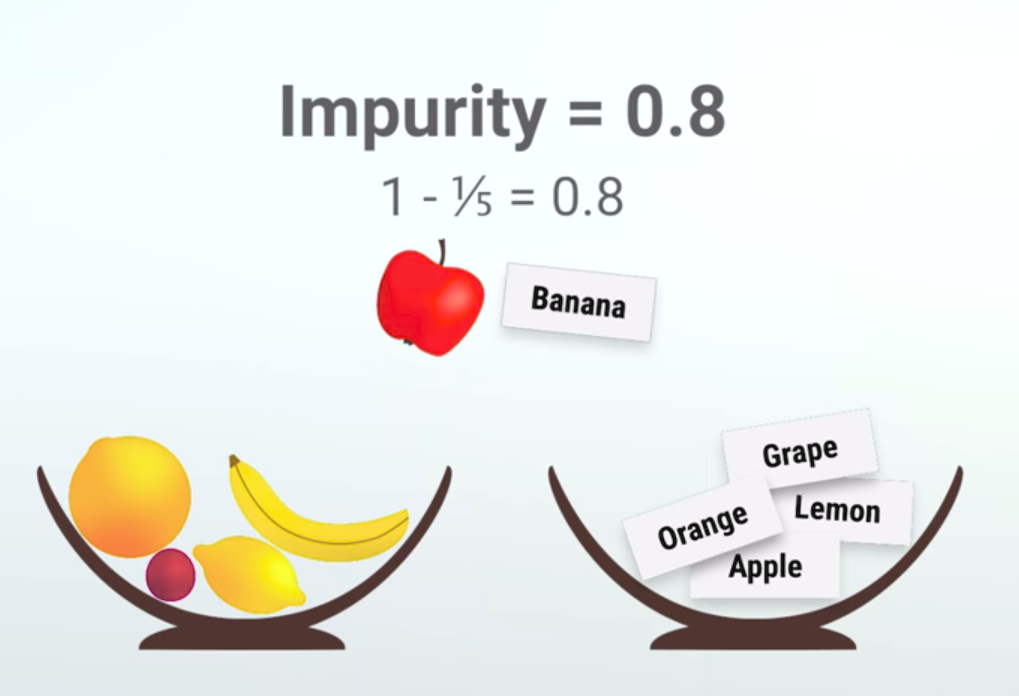

In [10]:
Image.open("impurity.png")
# gini impurity = 1 - (1/5)^2 - (1/5)^2 -... (5 times) -> = 1 - (1/25)*5

# How to calculate Gini Impurity

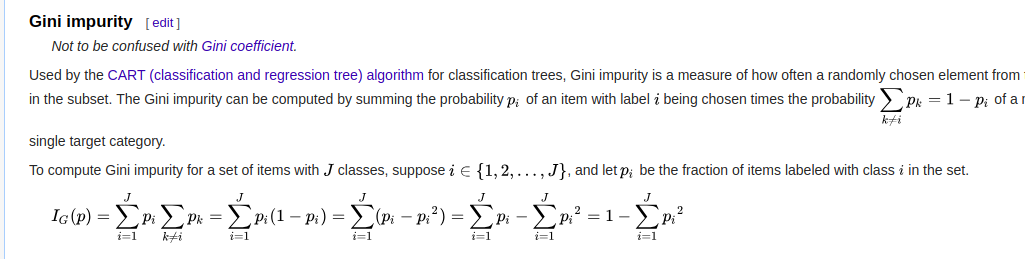

In [11]:
Image.open('giniwiki.png')
# We will do some example
# Remember, gini impurity is 'uncertainty', 'disorder' -> we want to reduce it the most
# Gini Impurity after each question need to be significantly declined -> Information Gain

# Information Gain

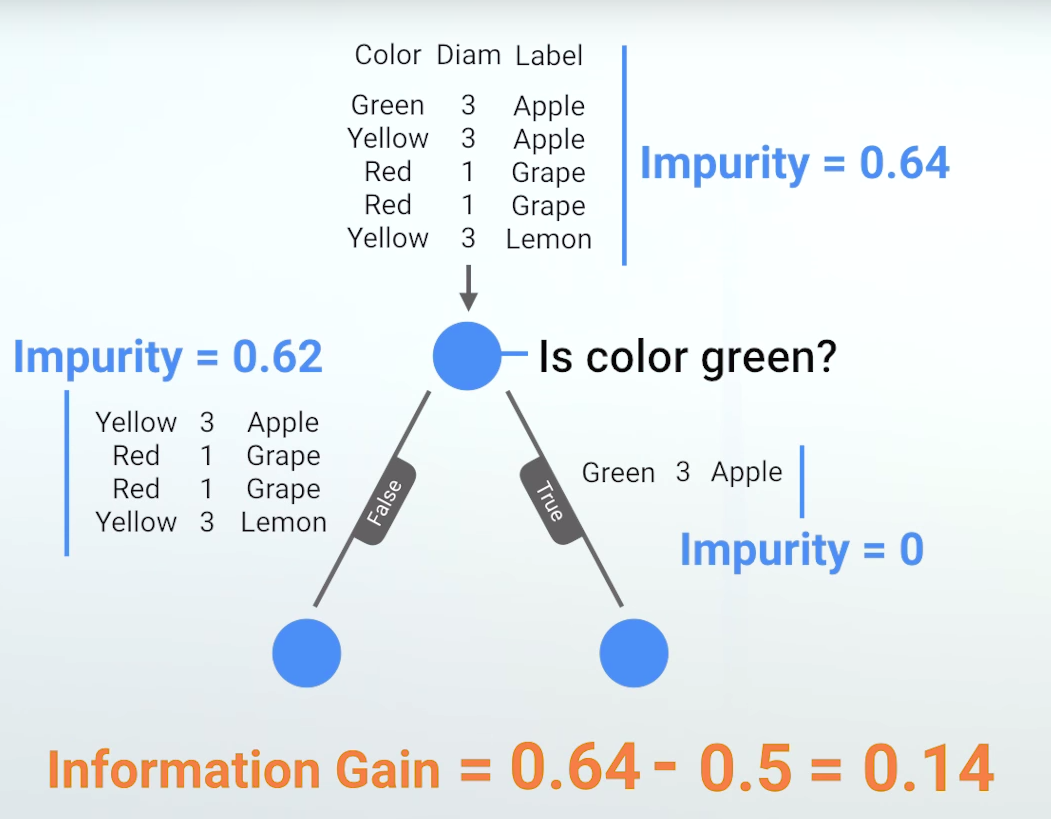

In [12]:
# example of calculating Impurity first!
# Impurity = 1 - (2/5)^2 - (2/5)^2 - (1/5)^2 = .64

# Impurity = 1 - (1/4)^2 - (2/4)^2 - (1/4)^2 = .625
Image.open('ig.png')

In [13]:
# calculate the Impurity of the child nodes -> take the average -> subtract to get int Information Gain
# this value will decide which question to ask at each node!

# Information Gain = 0.64 - 0.62*(4/5) - 0*(1/5) = 0.144

# Building Decision Tree

In [14]:
pd.DataFrame(training_data, columns=['Color', 'Diameter', 'Label'], index=np.arange(0,5))

,Color,Diameter,Label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


In [15]:
header = ["color", "diameter", "label"]

def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])
    # "set" in Discrete Math
    
unique_vals(training_data, 2) # 0,1,2

{'Apple', 'Grape', 'Lemon'}

In [16]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [17]:
class_counts(training_data)

{'Apple': 2, 'Grape': 2, 'Lemon': 1}

In [18]:
#isinstance(object, classinfo):
#Return TRUE if the object argument is an instance of the classinfo argument, or of a (direct, indirect or 
#virtual) subclass thereof. If object is not an object of the given type, the function always returns FALSE
#If classinfo is a tuple of type objects (or recursively, other such tuples),
#return true if object is an instance of any of the types.
#If classinfo is not a type or tuple of types and such tuples, a TypeError exception is raised.

def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)

In [19]:
is_numeric(6.34)

True

In [20]:
is_numeric("Red")

False

In [21]:
# Questions
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example): 
        # return TRUE or FALSE when comparing the feature value in an example to the feature value in question
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
            # The Quesion will just contain ">="
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to PRINT
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [22]:
# Question(column #, value)
Question(1, 5)

Is diameter >= 5?

In [23]:
Question(0, "Green")

Is color == Green?

In [24]:
# Partition
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it MATCHES the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows
    # return false_branch or true_branch

In [25]:
# test partition function:
true_rows, false_rows = partition(training_data, Question(0, 'Green'))
true_rows

[['Green', 3, 'Apple']]

In [26]:
false_rows

[['Yellow', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Lemon']]

In [27]:
# Gini Impurity
def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [28]:
def info_gain(left, right, current_uncertainty):
    "
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [29]:
gini(training_data)

0.6399999999999999

In [30]:
gini(false_rows)

0.625

In [31]:
info_gain(false_rows, true_rows, gini(training_data))

0.1399999999999999

In [32]:
def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [33]:
best_gain, best_question = find_best_split(training_data)
best_question

Is diameter >= 3?

In [34]:
best_gain

0.37333333333333324

In [35]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [36]:
class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [37]:
def build_tree(rows):
    """Builds the tree.

    Rules of RECURSION: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioning the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [38]:
def print_tree(node, spacing=""):
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [39]:
my_tree = build_tree(training_data)
print_tree(my_tree)

Is diameter >= 3?
--> True:
  Is color == Yellow?
  --> True:
    Predict {'Lemon': 1, 'Apple': 1}
  --> False:
    Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}


In [40]:
def classify(new, tree):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(tree, Leaf):
        return tree.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if tree.question.match(new):
        return classify(new, tree.true_branch)
    else:
        return classify(new, tree.false_branch)

In [41]:
classify(training_data[0], my_tree)

{'Apple': 1}

In [42]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [43]:
print_leaf(classify(training_data[0], my_tree))

{'Apple': '100%'}

In [44]:
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

In [45]:
for row in testing_data:
    print("Actual: %s. Predicted: %s" % (row[-1], print_leaf(classify(row, my_tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Lemon': '50%', 'Apple': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Lemon': '50%', 'Apple': '50%'}
